In [2]:
%pip install scikit-learn

%reset -f

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
import math

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import confusion_matrix, roc_auc_score, average_precision_score
import seaborn as sns
import matplotlib.pyplot as plt

Dataset Preprocessing

Dataset_1

In [4]:
def preprocessing_dataset_1():
    data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn copy.csv")
    data.drop(["customerID"],inplace=True,axis=1)
    
    data.drop_duplicates(inplace=True)
    data.dropna(subset=['Churn'],inplace=True)
    Features = data.drop('Churn',axis=1)
    Labels = data['Churn']
    Features['TotalCharges'] = Features['TotalCharges'].replace(' ', np.nan)
    Features['TotalCharges'] = Features['TotalCharges'].astype('float64')
    Features.fillna(Features.select_dtypes(include=['number']).mean(), inplace=True)
    for column in Features.select_dtypes(include=['object']).columns:
        mode_value = Features[column].mode()[0]
        Features[column].fillna(mode_value, inplace=True)
    encoder = LabelEncoder()
    Labels = encoder.fit_transform(Labels)
    non_one_hot_columns = []
    for c in Features.columns:
        if not pd.api.types.is_numeric_dtype(Features[c]):
            Features[c] = Features[c].astype('category')
        else:
            non_one_hot_columns.append(c)
        
    for c in Features.columns:
        if Features[c].dtype == 'category' :
            if Features[c].nunique() == 2 :
                Features[c] = encoder.fit_transform(Features[c])
            else :
                Features = pd.get_dummies(Features,columns=[c])
    scaler = StandardScaler()  
    Features[non_one_hot_columns] = scaler.fit_transform(Features[non_one_hot_columns])

    
    Features_train , Features_test, Labels_train, Labels_test = train_test_split(Features,Labels,test_size=0.2,random_state=40)
    Features_train,Features_val,Labels_train,Labels_val = train_test_split(Features_train,Labels_train,test_size=0.2,random_state=40)
    return Features_train, Features_val, Features_test, Labels_train, Labels_val, Labels_test



In [5]:
def preprocessing_dataset_2():
    name_of_col = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

    from ucimlrepo import fetch_ucirepo 
   
    adult = fetch_ucirepo(id=2) 
    input= adult.data.features
    input.replace('?', np.nan, inplace=True) 

    adult.data.features['income'] = adult.data.targets
    data = adult.data.features
    

    data.drop_duplicates(inplace=True)
    data.dropna(subset=['income'],inplace=True)
    Features = data.drop('income',axis=1)
    Labels = data['income']
    Labels = Labels.astype(str).str.rstrip('.')
    Features.fillna(Features.select_dtypes(include=['number']).mean(), inplace=True)
    for column in Features.select_dtypes(include=['object']).columns:
        mode_value = Features[column].mode()[0]
        Features[column].fillna(mode_value, inplace=True)
    encoder = LabelEncoder()
    Labels = encoder.fit_transform(Labels)
    non_one_hot_columns = []
    for c in Features.columns:
        if not pd.api.types.is_numeric_dtype(Features[c]):
            Features[c] = Features[c].astype('category')
        else:
            non_one_hot_columns.append(c)
        
    for c in Features.columns:
        if Features[c].dtype == 'category' :
            if Features[c].nunique() == 2 :
                Features[c] = encoder.fit_transform(Features[c])
            else :
                Features = pd.get_dummies(Features,columns=[c])
    scaler = StandardScaler()  
    Features[non_one_hot_columns] = scaler.fit_transform(Features[non_one_hot_columns])
    df_Features = pd.DataFrame(Features,columns=Features.columns) 
    df_Label = pd.DataFrame(Labels,columns=['income'])
    Label_series = df_Label['income']
    correlations = df_Features.corrwith(Label_series)
    correlations_abs = correlations.abs()
    correlations_sorted = correlations_abs.sort_values(ascending=False)
    Features_top_50 = correlations_sorted.index[:50]
    Features = Features[Features_top_50]
    
    Features_train , Features_test, Labels_train, Labels_test = train_test_split(Features,Labels,test_size=0.2,random_state=40)
    Features_train,Features_val,Labels_train,Labels_val = train_test_split(Features_train,Labels_train,test_size=0.2,random_state=40)
    return Features_train, Features_val, Features_test, Labels_train, Labels_val, Labels_test

In [6]:
def preprocessing_dataset_3():
    data = pd.read_csv("creditcard.csv")
    data.drop_duplicates(inplace=True)
    data.dropna(subset=['Class'],inplace=True)

    sample_positive = data[data['Class'] == 1]
    sample_negative = data[data['Class'] == 0].sample(n=20000,random_state=40)
    data = pd.concat([sample_positive, sample_negative])


    Features = data.drop('Class',axis=1)
    Labels = data['Class']
    Features.fillna(Features.select_dtypes(include=['number']).mean(), inplace=True)
    for column in Features.select_dtypes(include=['object']).columns:
        mode_value = Features[column].mode()[0]
        Features[column].fillna(mode_value, inplace=True)
    
    encoder = LabelEncoder()
    Labels = encoder.fit_transform(Labels)
    non_one_hot_columns = Features.columns.tolist()
    std_scaler = StandardScaler() 
    Features[non_one_hot_columns] = std_scaler.fit_transform(Features[non_one_hot_columns])
    
    

    Features_train , Features_test, Labels_train, Labels_test = train_test_split(Features,Labels,test_size=0.2,random_state=40)
    Features_train,Features_val,Labels_train,Labels_val = train_test_split(Features_train,Labels_train,test_size=0.2,random_state=40)
    return Features_train, Features_val, Features_test, Labels_train, Labels_val, Labels_test
    

In [7]:
def function_sigmoid(X):
    X = np.array(X, dtype=float)
    return 1/(1+np.exp(-X))

In [8]:
def Gradient_Descent(X,predicted_y , true_y):
    
    temp = (true_y - predicted_y) *predicted_y*(1-predicted_y)
    
    temp = np.dot(X.T,temp)/X.shape[0]
    temp.astype(np.float64)
    return temp

In [9]:
def Normalization(x):
    x=x.astype('float64')
    temp1 = x - x.mean(axis=0)
    temp2 = x.std(axis=0) + 1e-8
    return temp1 / temp2

In [10]:
def fitting_logistic_regression(x,true_y,Epoch,learing_rate= 0.01):
    Number_of_sample = x.shape[0]
    Number_of_features = x.shape[1]
    weight = np.zeros((Number_of_features + 1 , 1))
    x = Normalization(x)
    
    x = np.concatenate((x, np.ones((Number_of_sample, 1))), axis=1)

    true_y = true_y.reshape(Number_of_sample,1)
    iterations = 0
    while iterations< Epoch:

        hypothesis_y = function_sigmoid(np.dot(x,weight))
        derivative_loss = Gradient_Descent(x,hypothesis_y,true_y)
        weight = weight + learing_rate*derivative_loss

        iterations += 1
    
    return weight



In [11]:
def prediction_of_logistic_regression(Weight, x):
    Number_of_sample = x.shape[0]

    x = np.concatenate((x, np.ones((Number_of_sample, 1))), axis=1)

    prediction_y = function_sigmoid(np.dot(x,Weight))
    Prediction_list=[]
    for j in prediction_y:
        if j>= 0.5:
            Prediction_list.append(1)
        else:
            Prediction_list.append(0)
    return np.array(Prediction_list).reshape(Number_of_sample, 1) , prediction_y

In [12]:


def measurement(predicted_y,true_y, probability_y):
    true_negative, false_positive,false_negative,true_positive = confusion_matrix(true_y,predicted_y).ravel()
    accuracy = (true_positive+true_negative)/(true_negative+true_positive+false_negative+false_positive)
    true_positive_ratio = true_positive / (true_positive + false_negative)
    true_negative_ratio = true_negative / (true_negative +false_positive)
    positive_predictive_value = true_positive / (true_positive + false_positive)
    
    f1 = 2*((positive_predictive_value*true_positive_ratio)/(positive_predictive_value+true_positive_ratio))
    auroc = roc_auc_score(true_y,probability_y)
    aupr = average_precision_score(true_y,probability_y)
    
    
    return accuracy , true_positive_ratio , true_negative_ratio , positive_predictive_value , f1,auroc, aupr
    



In [13]:
# (dataset_Features_train, dataset_Features_val, dataset_Features_test, dataset_Labels_train, dataset_Labels_val, dataset_Labels_test)= preprocessing_dataset_1()

In [14]:
# (dataset_Features_train, dataset_Features_val, dataset_Features_test, dataset_Labels_train, dataset_Labels_val, dataset_Labels_test)= preprocessing_dataset_2()

In [15]:
# (dataset_Features_train, dataset_Features_val, dataset_Features_test, dataset_Labels_train, dataset_Labels_val, dataset_Labels_test)= preprocessing_dataset_3()

In [16]:
Labels_train = dataset_Labels_train.reshape(dataset_Labels_train.shape[0],1)
Labels_test = dataset_Labels_test.reshape(dataset_Labels_test.shape[0],1)

In [17]:



def Bagging_Stacking(Features_train,Features_valid,Features_test,Labels_train,Labels_valid,Labels_test):

    predicted_output = []
    test_output = []
     
    list_accuracy = []
    list__true_positive_ratio = []
    list_true_negative_ratio = []
    list_positive_predictive_value = []
    list_f1 = []
    list_auroc = []
    list_aupr = []
    
    for i in range(9):
        pointers = np.random.choice(Features_train.shape[0], Features_train.shape[0], replace=True)
        Features_sample = Features_train.iloc[pointers]
        Labels_sample = Labels_train[pointers]
        
        weight = fitting_logistic_regression(Features_sample,Labels_sample,Epoch=1000,learing_rate=0.01)
        (predicted,probability_y) = prediction_of_logistic_regression(weight,Features_valid)
        predicted_output.append(predicted)
        (predicted,probability_y) = prediction_of_logistic_regression(weight,Features_test)
        test_output.append(predicted)
        (accuracy , true_positive_ratio , true_negative_ratio,positive_predictive_value,f1,auroc,aupr  ) = measurement(predicted,Labels_test,probability_y)
        list_accuracy.append(accuracy)
        list__true_positive_ratio.append(true_positive_ratio)
        list_true_negative_ratio.append(true_negative_ratio)
        list_positive_predictive_value.append(positive_predictive_value)
        list_f1.append(f1)
        list_auroc.append(auroc)
        list_aupr.append(aupr)

    Features_valid = Features_valid.copy()
    Features_test = Features_test.copy()
    
    for i in range(len(test_output)):
        temp = 'prediction_'+str(i)
        Features_valid[temp]=predicted_output[i]
        Features_test[temp] = test_output[i]
   
    
    weight = fitting_logistic_regression(Features_valid,Labels_valid,Epoch=1000,learing_rate=0.01)
    (predicted,probability_y) = prediction_of_logistic_regression(weight,Features_test)
    (accuracy , true_positive_ratio , true_negative_ratio , positive_predictive_value , f1,auroc, aupr) = measurement(predicted,Labels_test,probability_y)
    print("Accuracy : ",round(accuracy*100,2),"%")
    print("Sensitivity : ",round(true_positive_ratio,4))
    print("Specificity : ",round(true_negative_ratio,4))
    print("Precision : ",round(positive_predictive_value,4))
    print("F1-Score : ",round(f1,4))
    print("AUROC : ",round(auroc,4))
    print("AUPR : ",round(aupr,4))

    df_performance = pd.DataFrame({
        'accuracy': list_accuracy,
        'sensitivity': list__true_positive_ratio,
        'specificity': list_true_negative_ratio,
        'precision': list_positive_predictive_value,
        'F1-score': list_f1,
        'AUROC': list_auroc,
        'AUPR': list_aupr
    })


    plt.figure(figsize=(16, 10))
    
    sns.violinplot(data=df_performance, palette="muted")
    
    plt.title('violin plots')
    plt.xticks(rotation=45)
    plt.show()





Accuracy :  79.07 %
Sensitivity :  0.6856
Specificity :  0.8282
Precision :  0.587
F1-Score :  0.6325
AUROC :  0.8429
AUPR :  0.6507


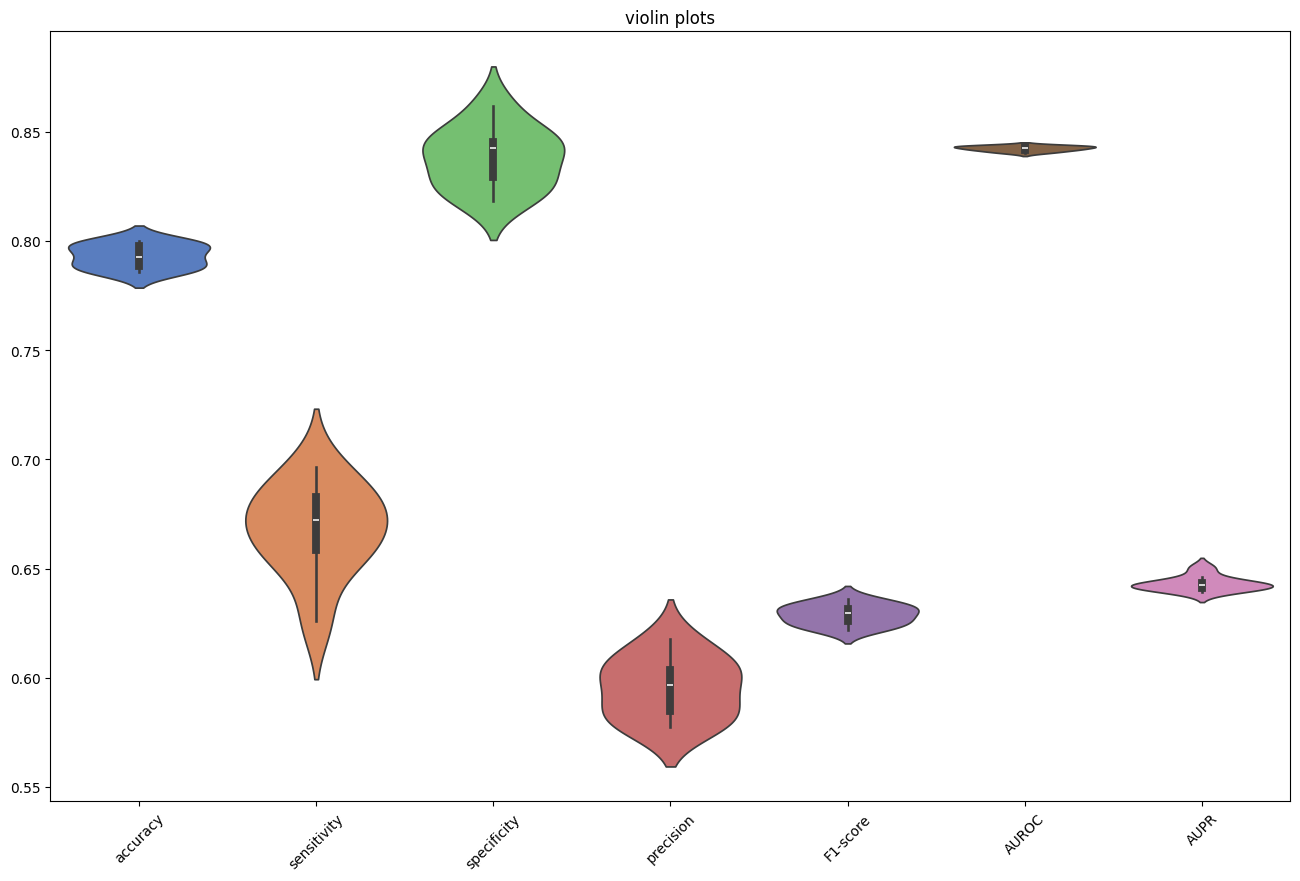

In [18]:
Bagging_Stacking(dataset_Features_train,dataset_Features_val,dataset_Features_test,dataset_Labels_train,dataset_Labels_val,dataset_Labels_test)

In [19]:


def Voting_Ensemble(Features_train,Features_valid,Features_test,Labels_train,Labels_valid,Labels_test):

 
    test_output = []
    list_pobability=[]
    for i in range(9):
        pointers = np.random.choice(Features_train.shape[0], Features_train.shape[0], replace=True)
        Features_sample = Features_train.iloc[pointers]
        Labels_sample = Labels_train[pointers]
        
        weight = fitting_logistic_regression(Features_sample,Labels_sample,Epoch=1000,learing_rate=0.01)

        (predicted,probalility_y) = prediction_of_logistic_regression(weight,Features_test)
        test_output.append(predicted)
        list_pobability.append(probalility_y)
    
    predicted = []
    probability = []
    for i in range(len(test_output[0])):
        temp = 0.0
        sum=0
        for j in range(9):
            sum +=test_output[j][i]
            temp +=list_pobability[j][i]
        temp /=9
        probability.append(temp)
        if sum>=5 :
            predicted.append(1)
        else:
            predicted.append(0)
        
    

    (accuracy , true_positive_ratio , true_negative_ratio , positive_predictive_value , f1,auroc, aupr)= measurement(predicted,Labels_test,probability)

    print("Accuracy : ",round(accuracy*100,2),"%")
    print("Sensitivity : ",round(true_positive_ratio,4))
    print("Specificity : ",round(true_negative_ratio,4))
    print("Precision : ",round(positive_predictive_value,4))
    print("F1-Score : ",round(f1,4))
    print("AUROC : ",round(auroc,4))
    print("AUPR : ",round(aupr,4))




In [20]:
Voting_Ensemble(dataset_Features_train,dataset_Features_val,dataset_Features_test,dataset_Labels_train,dataset_Labels_val,dataset_Labels_test)

Accuracy :  79.57 %
Sensitivity :  0.6721
Specificity :  0.8398
Precision :  0.599
F1-Score :  0.6335
AUROC :  0.8425
AUPR :  0.6452


In [21]:


def LR_calculation(Features_train,Features_valid,Features_test,Labels_train,Labels_valid,Labels_test):

 
    list_accuracy = []
    list__true_positive_ratio = []
    list_true_negative_ratio = []
    list_positive_predictive_value = []
    list_f1 = []
    list_auroc = []
    list_aupr = []
    
    for i in range(9):
        pointers = np.random.choice(Features_train.shape[0], Features_train.shape[0], replace=True)
        Features_sample = Features_train.iloc[pointers]
        Labels_sample = Labels_train[pointers]
        
        weight = fitting_logistic_regression(Features_sample,Labels_sample,Epoch=1000,learing_rate=0.01)

        (predicted, probability_y) = prediction_of_logistic_regression(weight,Features_test)
        (accuracy , true_positive_ratio , true_negative_ratio,positive_predictive_value,f1,auroc,aupr  ) = measurement(predicted,Labels_test,probability_y)
        list_accuracy.append(accuracy)
        list__true_positive_ratio.append(true_positive_ratio)
        list_true_negative_ratio.append(true_negative_ratio)
        list_positive_predictive_value.append(positive_predictive_value)
        list_f1.append(f1)
        list_auroc.append(auroc)
        list_aupr.append(aupr)
        
        

        
    avg_accuracy = 0.0
    for i in range(9):
        avg_accuracy += list_accuracy[i]
    avg_accuracy /=9
    avg_true_positive_ratio = 0.0
    for i in range(9):
        avg_true_positive_ratio += list__true_positive_ratio[i]
    avg_true_positive_ratio /=9
    avg_true_negative_ratio = 0.0
    for i in range(9):
        avg_true_negative_ratio += list_true_negative_ratio[i]
    avg_true_negative_ratio /= 9

    avg_positive_predictive_value = 0.0
    for i in range(9):
        avg_positive_predictive_value += list_positive_predictive_value[i]
    avg_positive_predictive_value /=9
    avg_f1 = 0.0
    for i in range(9):
        avg_f1 += list_f1[i]
    avg_f1 /=9
    avg_auroc = 0.0
    for i in range(9):
        avg_auroc += list_auroc[i]
    avg_auroc /=9

    avg_aupr = 0.0
    for i in range(9):
        avg_aupr +=list_aupr[i]
    avg_aupr /= 9

    std_accuracy = np.std(list_accuracy)
    std_true_positive_ratio = np.std(list__true_positive_ratio)
    std_true_negative_ratio = np.std(list_true_negative_ratio)
    std_positive_predictive_value = np.std(list_positive_predictive_value)
    std_f1 = np.std(list_f1)
    std_auroc = np.std(list_auroc)
    std_aupr = np.std(list_aupr)

    print("Accuracy : ", round(avg_accuracy , 4), " ±", round(std_accuracy, 4))
    print("Sensitivity : ", round(avg_true_positive_ratio, 4), "±", round(std_true_positive_ratio, 4))
    print("Specificity : ", round(avg_true_negative_ratio, 4), "±", round(std_true_negative_ratio, 4))
    print("Precision : ", round(avg_positive_predictive_value, 4), "±", round(std_positive_predictive_value, 4))
    print("F1-Score : ", round(avg_f1, 4), "±", round(std_f1, 4))
    print("AUROC : ", round(avg_auroc, 4), "±", round(std_auroc, 4))
    print("AUPR : ", round(avg_aupr, 4), "±", round(std_aupr, 4))
   






In [22]:
LR_calculation(dataset_Features_train,dataset_Features_val,dataset_Features_test,dataset_Labels_train,dataset_Labels_val,dataset_Labels_test)

Accuracy :  0.7956  ± 0.0041
Sensitivity :  0.6655 ± 0.0183
Specificity :  0.8419 ± 0.0108
Precision :  0.6003 ± 0.0101
F1-Score :  0.6309 ± 0.0052
AUROC :  0.8421 ± 0.0011
AUPR :  0.643 ± 0.0034
